## GPS data

In [64]:
import requests, zipfile, io, gzip, glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from mpl_toolkits.basemap import Basemap

In [2]:
P157_n = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/P157_n.csv')
P157_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/P157_e.csv')
P157_u = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/P157_u.csv')

In [3]:
P157_n_filtered = P157_n[(P157_n['T'] > 2012) & (P157_n['T'] < 2014)]
P157_e_filtered = P157_e[(P157_e['T'] > 2012) & (P157_e['T'] < 2014)]
P157_u_filtered = P157_u[(P157_u['T'] > 2012) & (P157_u['T'] < 2014)]

Text(0.5, 0, 'Time (years)')

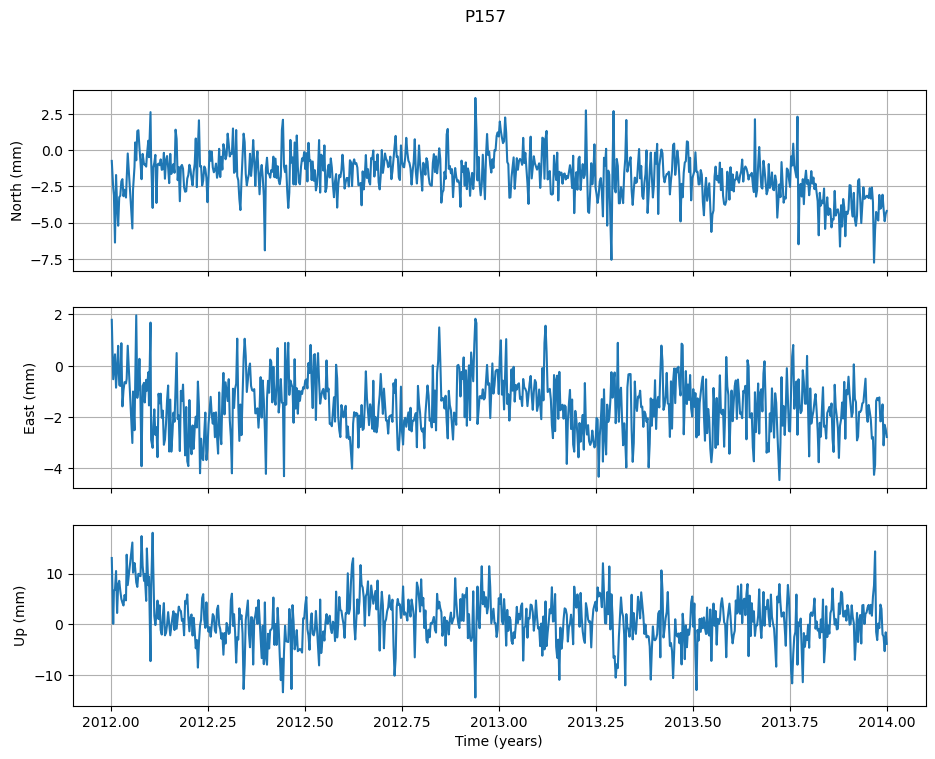

In [4]:
# Plot the graph
fig,ax=plt.subplots(3,1,figsize=(11,8),sharex=True)
fig.suptitle('P157')
ax[0].plot(P157_n_filtered['T'],P157_n_filtered['RESIDUALS']);ax[0].grid(True);ax[0].set_ylabel('North (mm)')
ax[1].plot(P157_e_filtered['T'],P157_e_filtered['RESIDUALS']);ax[1].grid(True);ax[1].set_ylabel('East (mm)')
ax[2].plot(P157_u_filtered['T'],P157_u_filtered['RESIDUALS']);ax[2].grid(True);ax[2].set_ylabel('Up (mm)')
ax[2].set_xlabel('Time (years)')

## GPS and NOAA stations

In [5]:
GPS = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_station.csv')
NOAA = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_station.csv')

In [6]:
GPS

,Station,Lat,Long
0,P157,44.82428,-116.39877
1,P316,41.55913,-124.08614
2,P332,40.54665,-123.1745
3,P364,43.09033,-124.40929
4,P367,44.58525,-124.06157
5,P407,45.95465,-123.931
6,P733,42.44202,-124.4133
7,P734,42.07664,-124.29326
8,CHZZ,45.48652,-123.97812
9,PTSG,41.78274,-124.2552


In [7]:
NOAA

,State,ID,Name,Lat,Long
0,CA,9410170,San Diego,32.715,-117.176667
1,CA,9410230,La Jolla,32.866667,​​-117.256667
2,CA,9410660,Los Angeles,33.72,-118.271667
3,CA,9410840,Santa Monica,34.008333,-118.5
4,CA,9411340,Santa Barbara,34.405,-119.691667
5,CA,9412110,Port San Luis,35.176667,-120.76
6,CA,9413450,Monterey,36.608333,-121.891667
7,CA,9414290,San Francisco,37.806667,-122.466667
8,CA,9414523,Redwood City,37.506667,-122.211667
9,CA,9414750,Alameda,37.771667,-122.3


In [41]:
fig = px.scatter_geo(NOAA,
                     lat='Lat',lon='Long', 
                     height=600, width=600,
                     hover_name='Name',
                     hover_data=['State','ID']);
fig.update_geos(resolution=110, showcountries=True,showland=True,showcoastlines=True,
               lonaxis=dict(range=[-130, -115], gridwidth=1, dtick=2, showgrid=True),
               lataxis=dict(range=[32, 50], gridwidth=1, dtick=2, showgrid=True))

In [73]:
from itertools import chain

def draw_map (m, scale=0.2):
    #draw a shaded-relief image
    m.shadedrelief(scale=scale)

    #lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90,90,13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    #keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    #cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='black')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


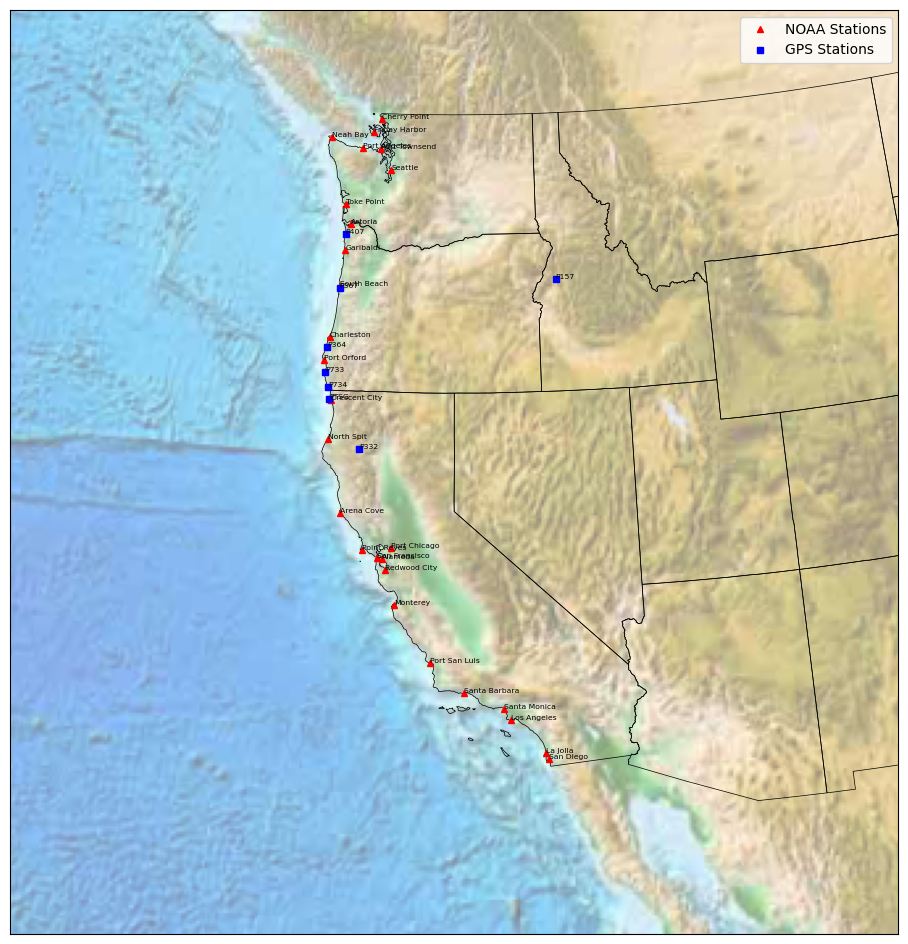

In [89]:
# Clean 'Long' column in NOAA and GPS dataset
NOAA['Long'] = NOAA['Long'].replace('\u200b\u200b', '', regex=True)
NOAA['Long'] = pd.to_numeric(NOAA['Long'], errors='coerce')

GPS['Long'] = GPS['Long'].replace('\u200b\u200b', '', regex=True)
GPS['Long'] = pd.to_numeric(GPS['Long'], errors='coerce')

# Drop rows with NaN values in Long or Lat
NOAA = NOAA.dropna(subset=['Long', 'Lat']) 
GPS = GPS.dropna(subset=['Long', 'Lat'])

# Extract latitude and longitude
Lat_NOAA = NOAA['Lat']
Long_NOAA = NOAA['Long']
Lat_GPS = GPS['Lat']
Long_GPS = GPS['Long']
Name_NOAA = NOAA['Name']
Name_GPS = GPS['Station']

fig = plt.figure(figsize = (12, 12))
m = Basemap(projection= 'lcc', resolution = None, 
            width = 2.5E6, height = 2.6E6,
            lat_0 = 40, lon_0 = -120)

#draw_map(m)

# Specify the correct path to the shapefile (replace 'path_to_directory' with the correct path)
shapefile_path = '/Users/suphakornpoobua/Documents/GitHub/Undergraduate-Research-2/'

# Add state boundaries
m.readshapefile(shapefile_path + 'st99_d00', name='states', drawbounds=True)

m.etopo(scale=1, alpha=0.5)

# Map (Long, Lat) to (x, y) for plotting all points at once
X, Y = m(Long_NOAA.values, Lat_NOAA.values)
A, B = m(Long_GPS.values, Lat_GPS.values)

# Plot all points at once
plt.plot(X, Y, '^', markersize=5, color='red', label='NOAA Stations')
plt.plot(A, B, 's', markersize=5, color='blue', label='GPS Stations')

# Add text labels for each point
for x, y, name1 in zip(X, Y, Name_NOAA):
    plt.text(x, y, name1, fontsize=5.5)

# Add text labels for each point
for a, b, name2 in zip(A, B, Name_GPS):
    plt.text(a, b, name2, fontsize=5.5)   

plt.legend()
plt.show()